## Objective
The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

## Data Set Description
The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:

•	distance_to_solar_noon, in radians.

•	temperature, daily average temperature, in degrees Celsius.

•	wind_direction, daily average wind direction, in degrees (0-360).

•	wind_speed, daily average wind speed, in meters per second.

•	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

•	visibility, in kilometers.

•	humidity, in percentage.

•	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.

•	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.

•	power_generated(Target), in Jules for each 3 hours


# 1) Exploratory Data Analysis

## a) Importing Required Packages

In [2]:
# Data Manipulation
import pandas as pd 
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# To remove the unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the dataset
solar_df = pd.read_csv("solarpowergeneration.csv")

In [4]:
solar_df.head(5) # checking first 5 records of the dataset

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
solar_df.tail(10)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2910,0.523627,61,27,15.8,3,10.0,84,17.0,29.85,895
2911,0.753512,61,27,15.8,4,10.0,90,13.0,29.87,0
2912,0.857875,63,27,13.9,4,10.0,93,11.0,29.86,0
2913,0.627401,63,27,13.9,4,10.0,90,11.0,29.86,0
2914,0.396927,63,27,13.9,4,10.0,87,9.0,29.90,464
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [6]:
solar_df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


## b)Descriptive Statistics

In [7]:
solar_df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [8]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [9]:
solar_df.isna().sum() # checking for null values

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
#filling null values with median
solar_df["average-wind-speed-(period)"] = solar_df["average-wind-speed-(period)"].fillna(solar_df["average-wind-speed-(period)"].median())

In [11]:
solar_df.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
solar_df.drop(columns ="visibility",inplace = True)
# visiability column has same value in all records this not make in variance in the data and does not play important role for predicting target variable

In [13]:
solar_df.head(3)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,70,0.0,29.89,5418


In [14]:
# checking for duplicates
solar_df.duplicated().sum()


np.int64(0)

In [15]:
# detection of outlier using boxplot

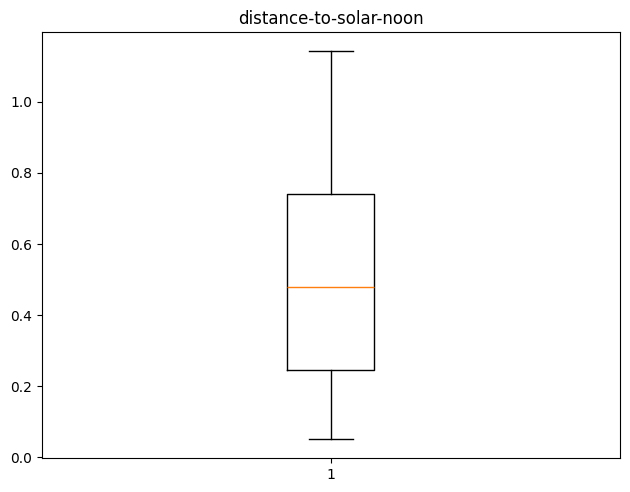

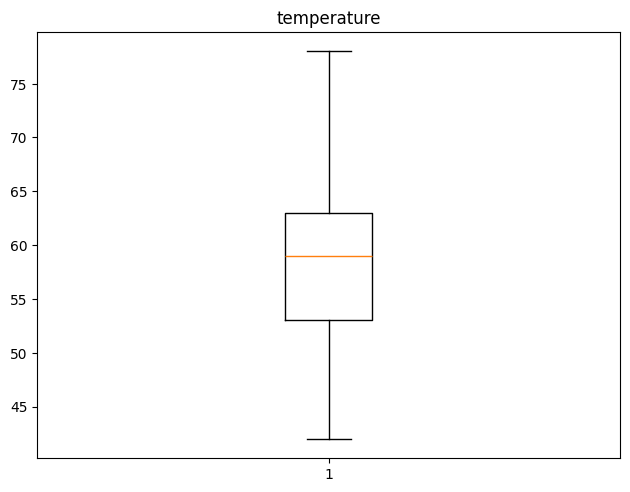

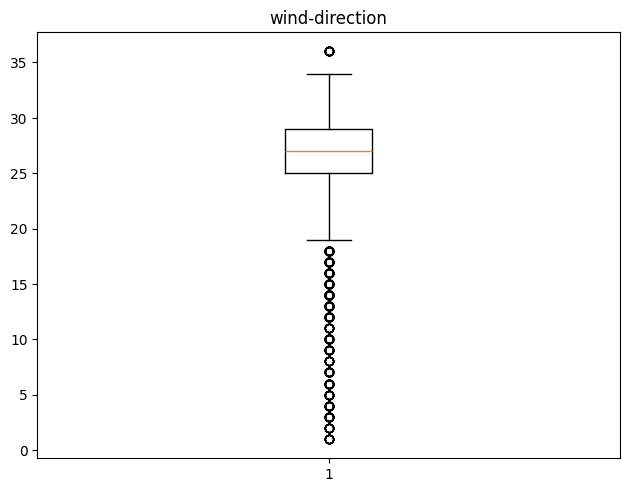

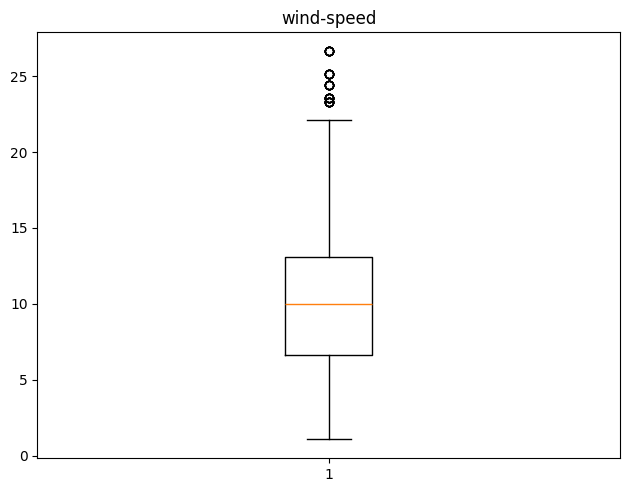

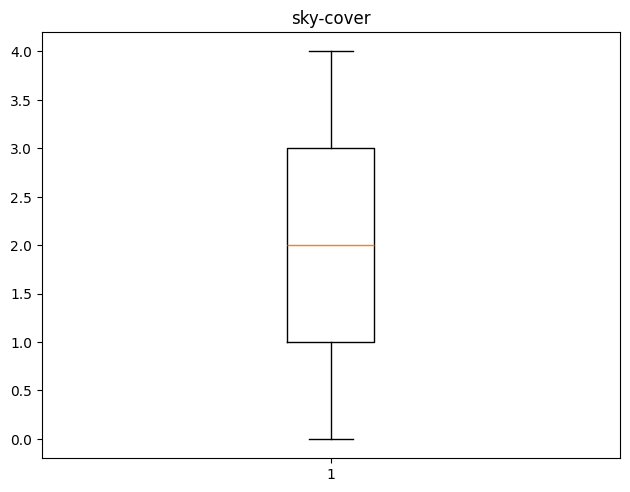

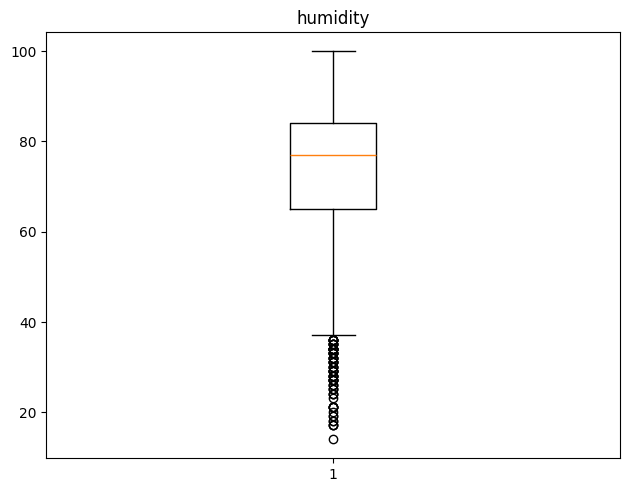

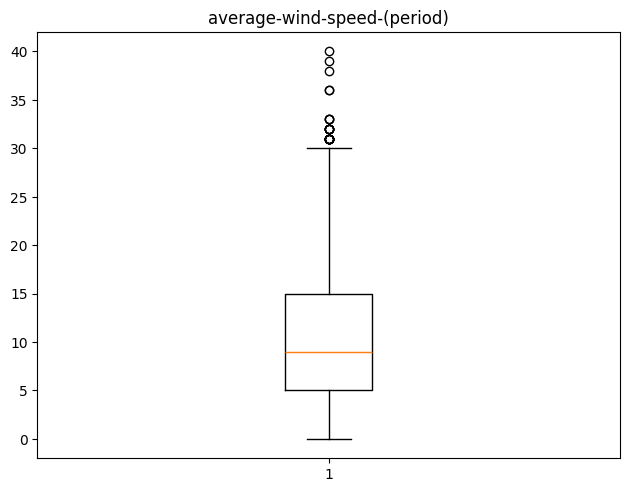

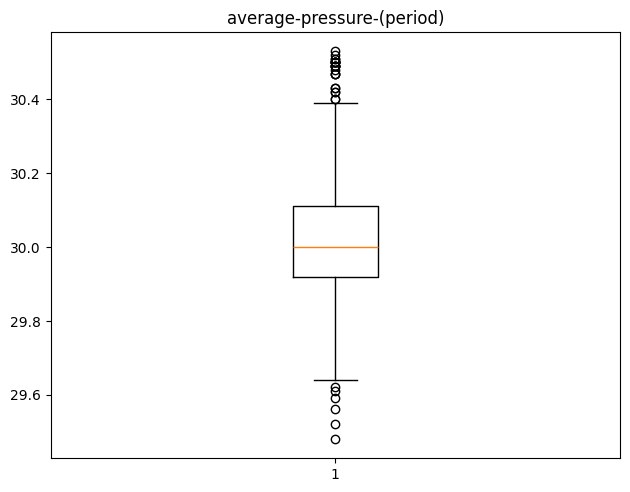

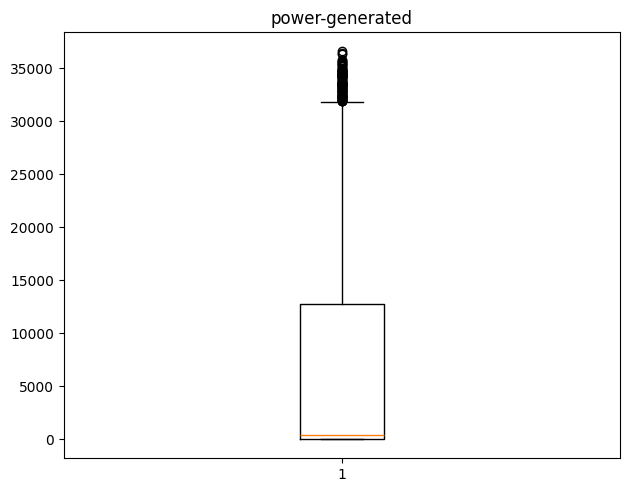

In [16]:
for col in solar_df.columns:
    plt.boxplot(solar_df[col])
    plt.tight_layout()
    plt.title(col)
    plt.show()


In [17]:
# treat outlier using boxplot method 

In [18]:
def outlier_detection(data,columns): # outlier detection function 
    for col in columns:
        Q1 =data[col].quantile(0.25)
        Q3 =data[col].quantile(0.75)
        iqr = Q3-Q1
        upper = Q3+1.5*iqr
        lower = Q1-1.5*iqr
        data[col] = np.clip(data[col],upper,lower)
    return data

In [19]:
data_columns = solar_df.columns

In [20]:
solar_df =outlier_detection(solar_df,data_columns)

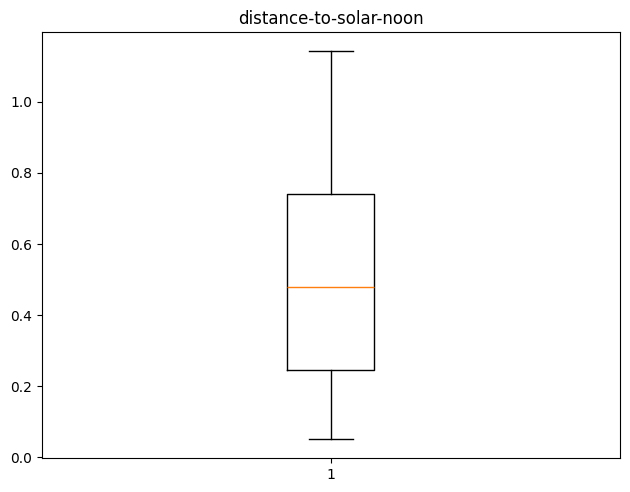

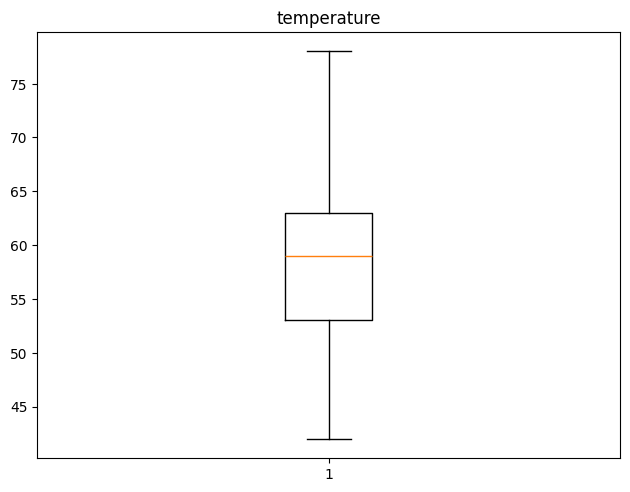

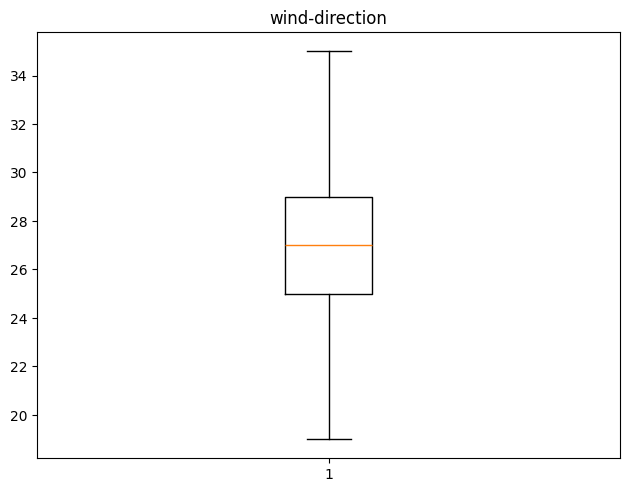

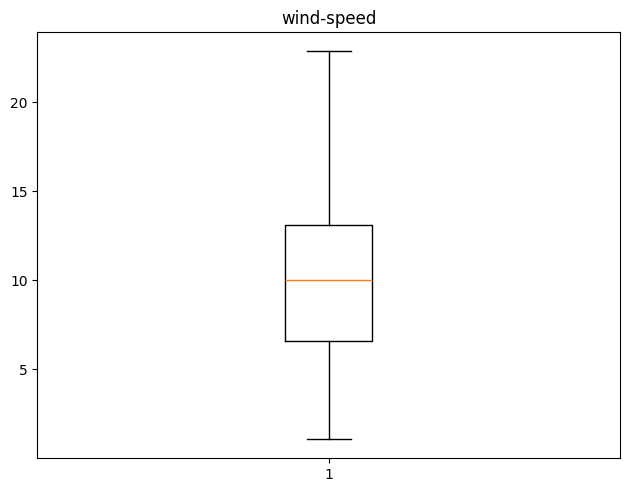

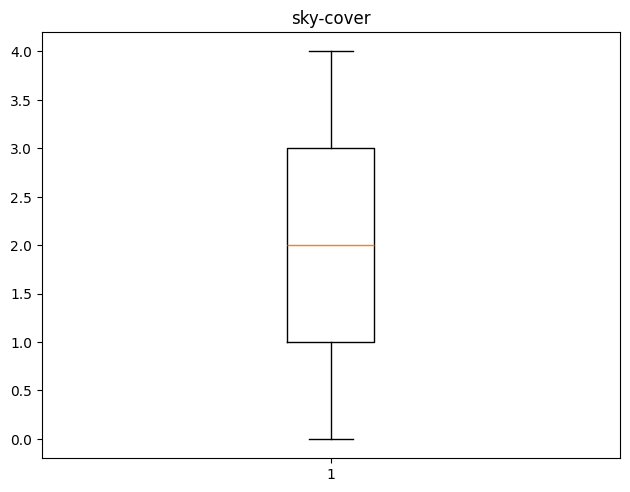

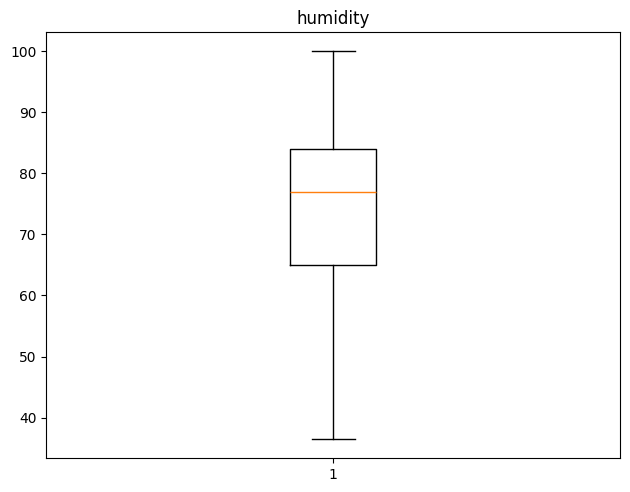

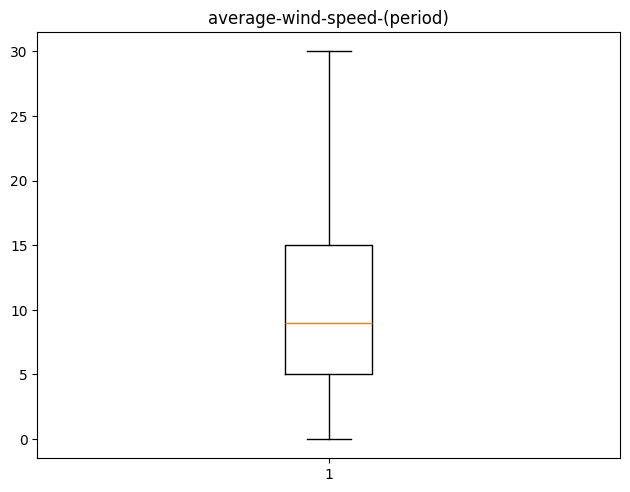

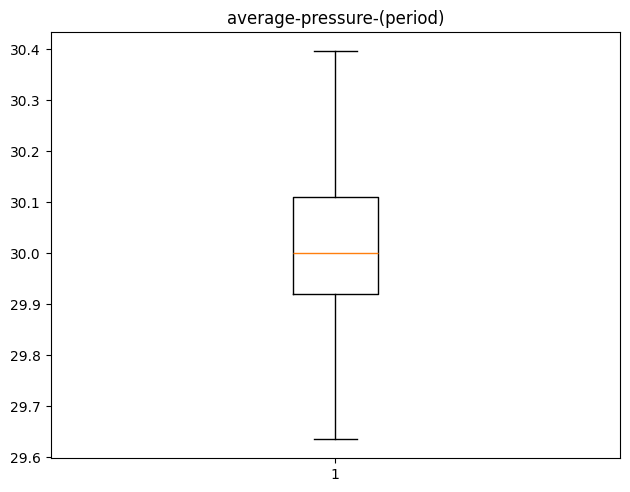

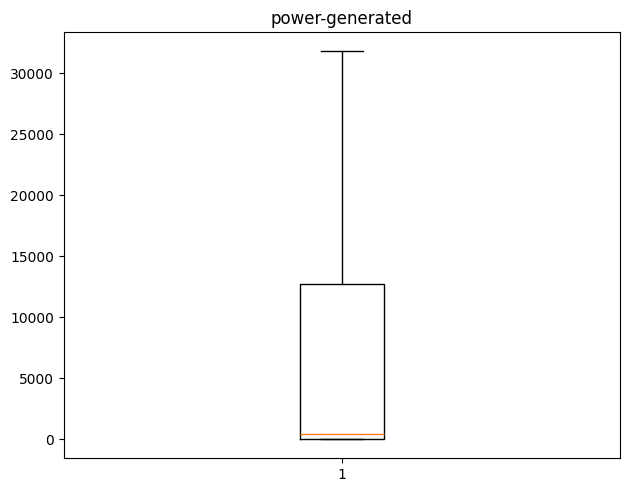

In [21]:
for col in solar_df.columns:
    plt.boxplot(solar_df[col])
    plt.tight_layout()
    plt.title(col)
    plt.show()


In [22]:
solar_df["power-generated"].value_counts()

power-generated
0.00        1320
31808.75     107
229.00         3
3.00           3
738.00         3
            ... 
5372.00        1
26175.00       1
31028.00       1
17989.00       1
10820.00       1
Name: count, Length: 1423, dtype: int64

In [23]:
mean_ =solar_df["power-generated"].mean()

In [24]:
solar_df['power-generated'] = solar_df['power-generated'].replace(0,mean_)

In [25]:
solar_df['power-generated'].value_counts()

power-generated
6909.688099     1320
31808.750000     107
229.000000         3
3.000000           3
738.000000         3
                ... 
5372.000000        1
26175.000000       1
31028.000000       1
17989.000000       1
10820.000000       1
Name: count, Length: 1423, dtype: int64

In [26]:
solar_df['power-generated'].value_counts()

power-generated
6909.688099     1320
31808.750000     107
229.000000         3
3.000000           3
738.000000         3
                ... 
5372.000000        1
26175.000000       1
31028.000000       1
17989.000000       1
10820.000000       1
Name: count, Length: 1423, dtype: int64

In [27]:
solar_df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,75.0,8.0,29.82,6909.688099
1,0.628535,69,28,7.5,0,77.0,5.0,29.85,6909.688099
2,0.397172,69,28,7.5,0,70.0,0.0,29.89,5418.000000
3,0.165810,69,28,7.5,0,36.5,0.0,29.91,25477.000000
4,0.065553,69,28,7.5,0,36.5,3.0,29.89,30069.000000
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,75.0,10.0,29.93,6995.000000
2916,0.064020,63,27,13.9,1,66.0,15.0,29.91,29490.000000
2917,0.294494,63,27,13.9,2,68.0,21.0,29.88,17257.000000
2918,0.524968,63,27,13.9,2,81.0,17.0,29.87,677.000000


## c)Visualisation

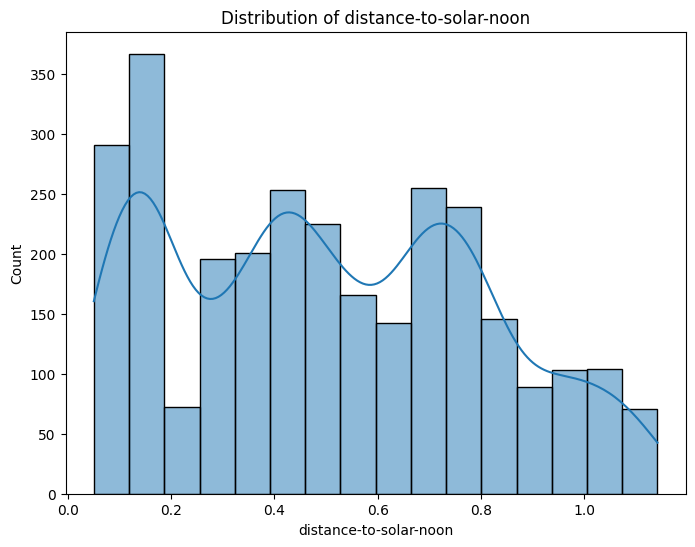

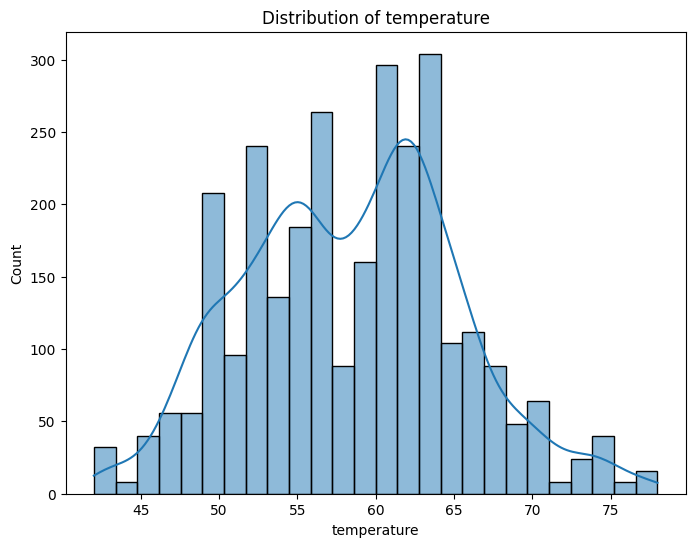

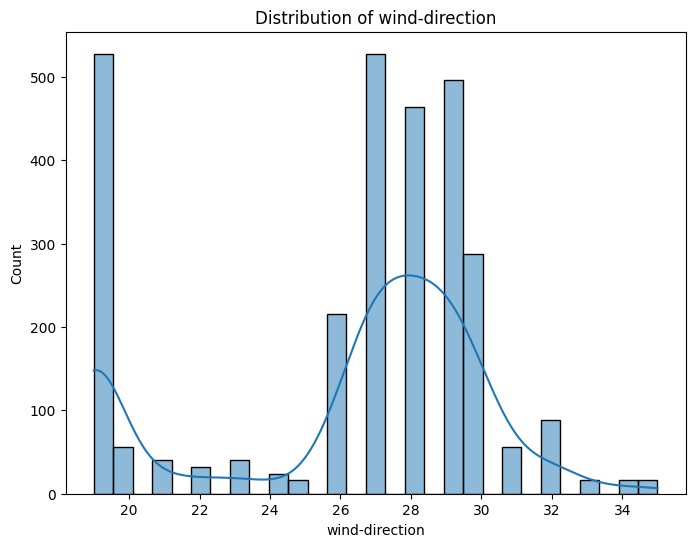

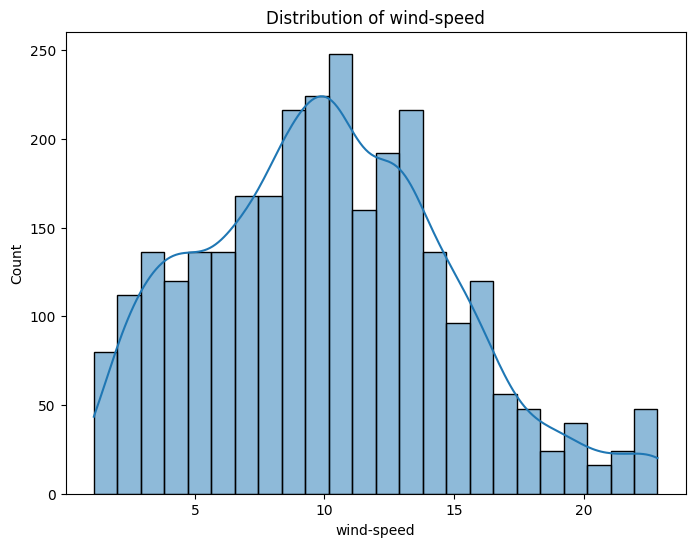

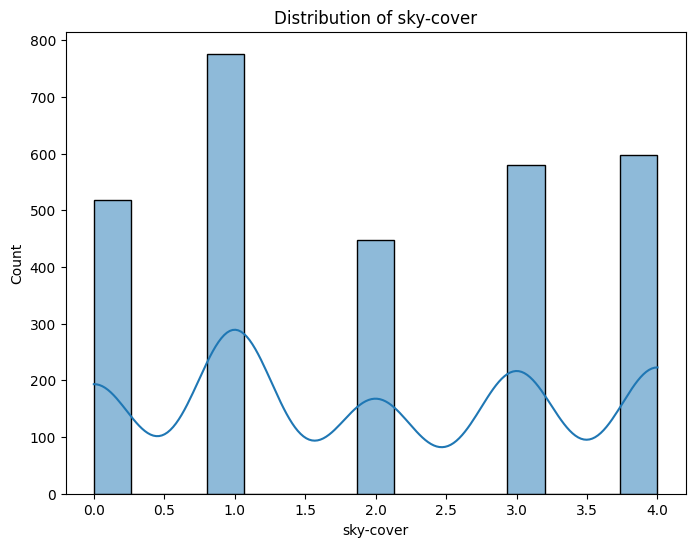

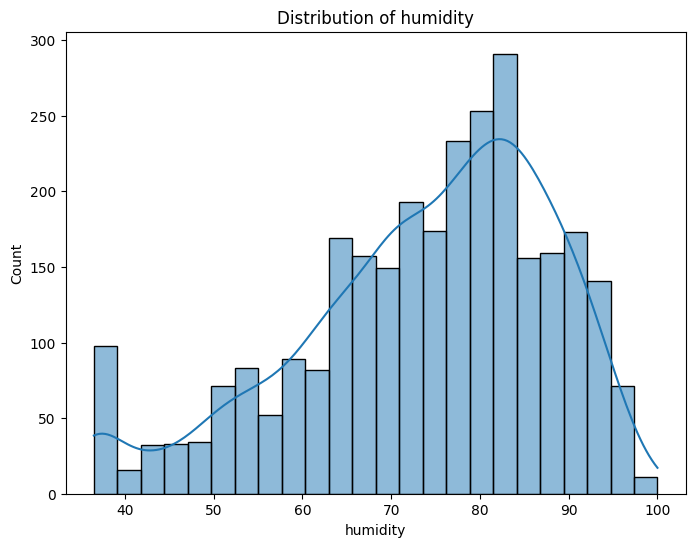

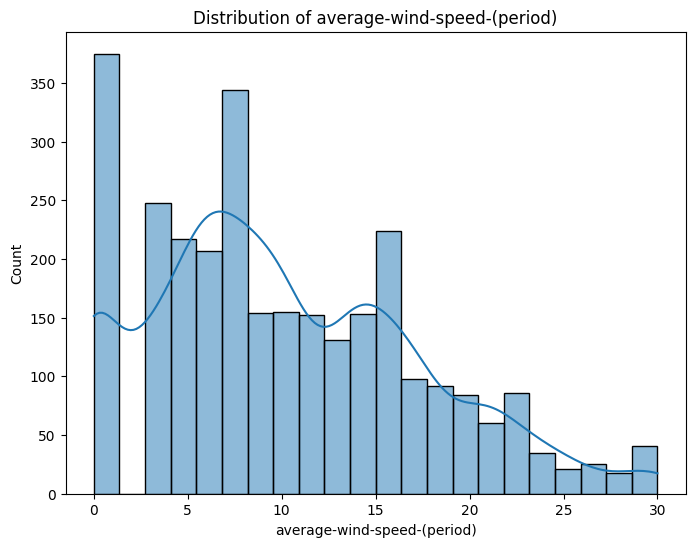

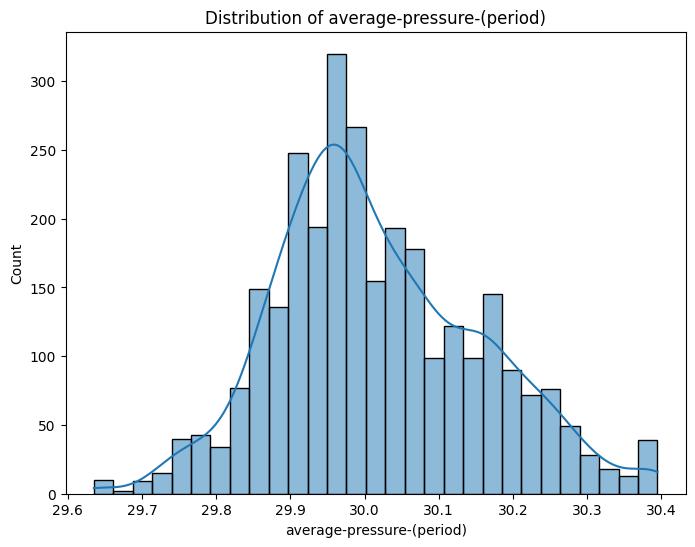

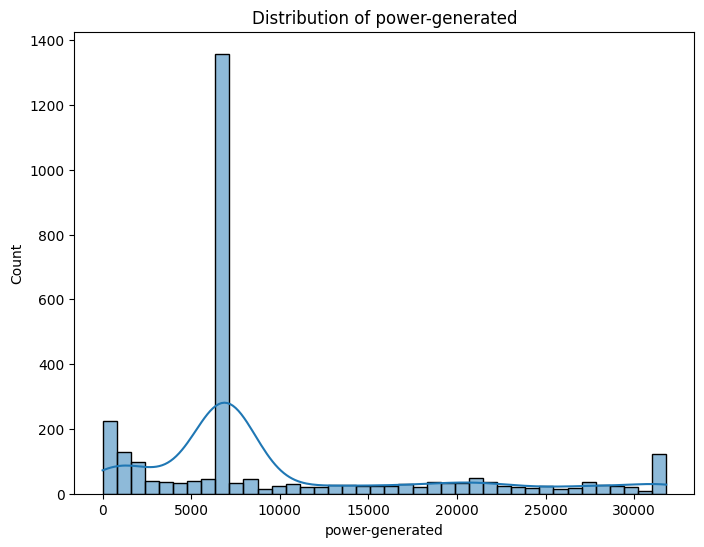

In [28]:
# Check data distribution after outlier treatment
for col in solar_df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(solar_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [29]:
solar_df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

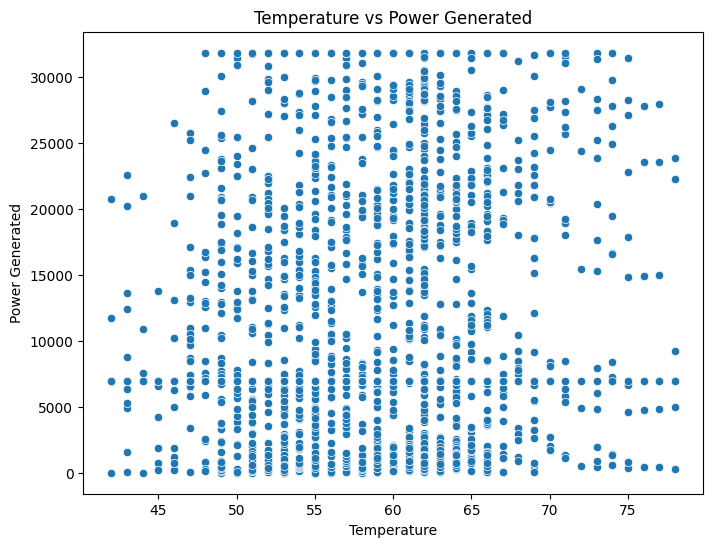

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=solar_df, x='temperature', y='power-generated', palette='viridis')
plt.title('Temperature vs Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')
plt.show()



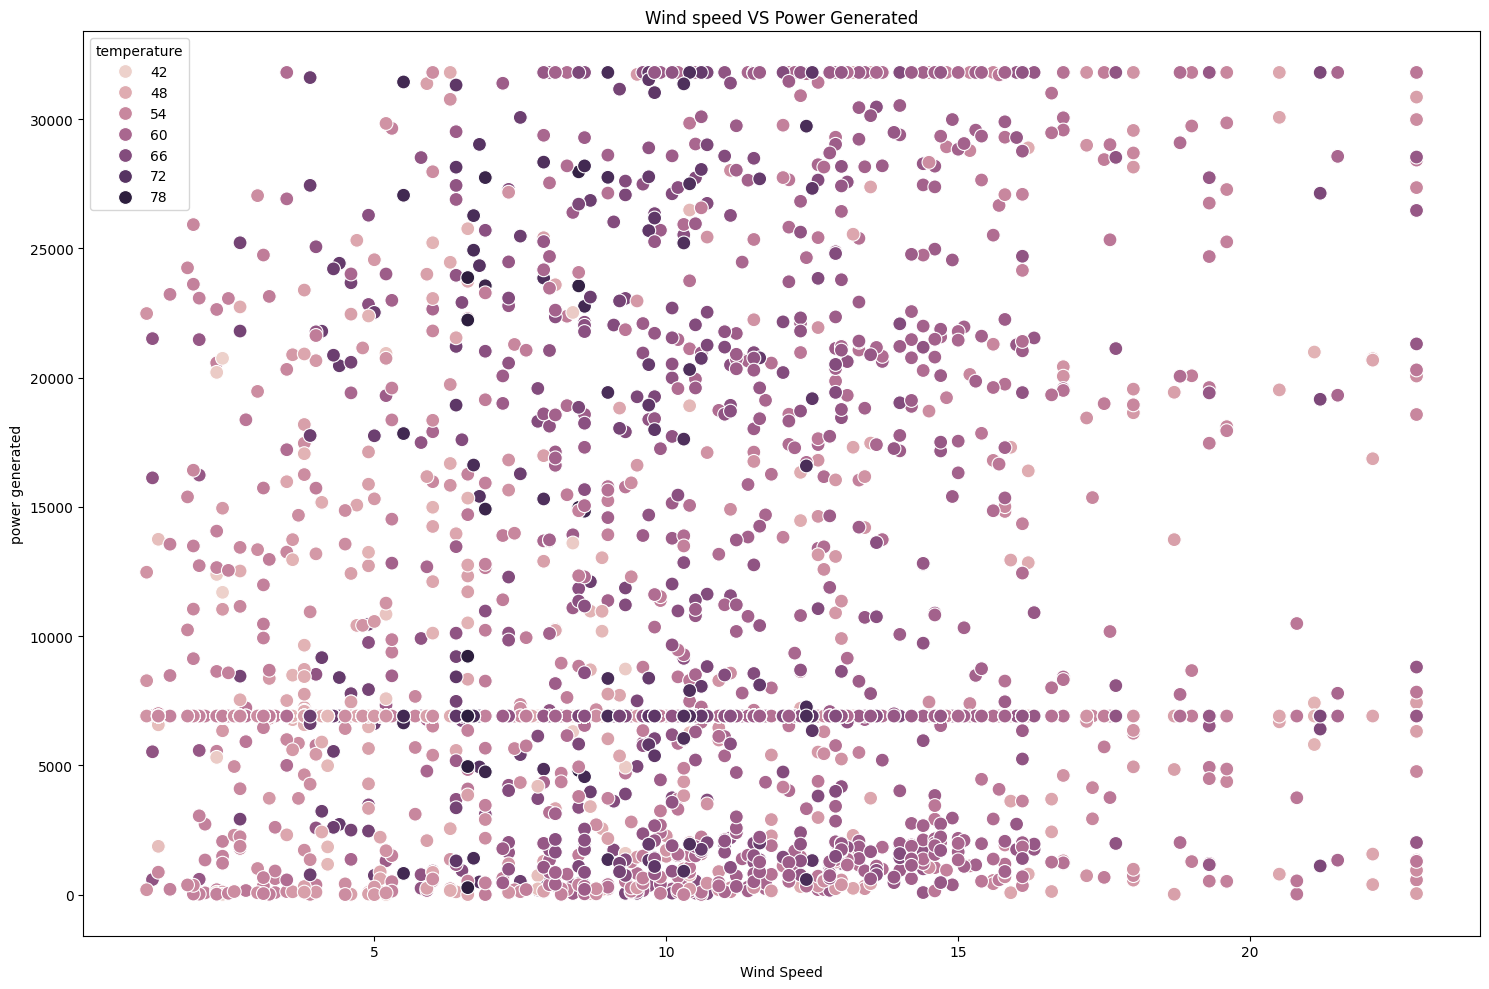

In [31]:
plt.figure(figsize =(15,10))
sns.scatterplot(data =solar_df,x ="wind-speed",y="power-generated",color = "red",marker ="o",s =100,hue = "temperature")
plt.title("Wind speed VS Power Generated")
plt.xlabel("Wind Speed")
plt.ylabel("power generated")
plt.tight_layout()
plt.show()


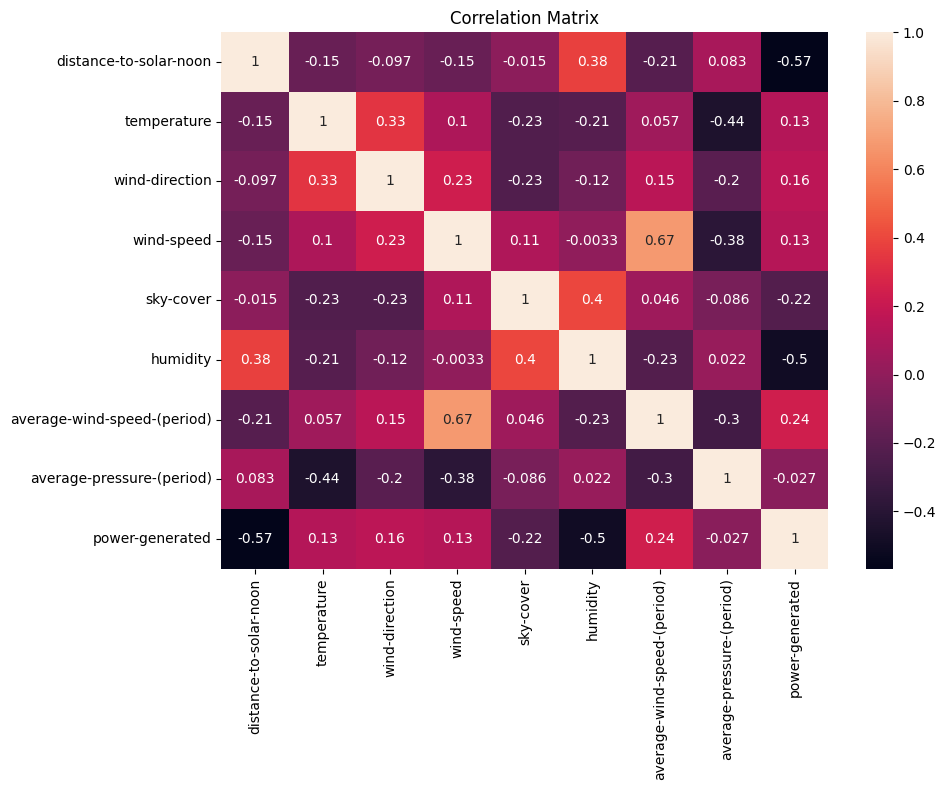

In [32]:
plt.figure(figsize =(10,8))
sns.heatmap(solar_df.corr(),annot =True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()           

## d)Important Feature Selection 

In [33]:
solar_df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [34]:
# here we change the column names for the Ols method
solar_df = solar_df.rename(columns={
    'distance-to-solar-noon': 'distance_to_solar_noon',
    'temperature': 'temperature',
    'wind-direction': 'wind_direction',
    'wind-speed': 'wind_speed',
    'sky-cover': 'sky_cover',
    'humidity': 'humidity',
    'average-wind-speed-(period)': 'average_wind_speed',
    'average-pressure-(period)': 'average_pressure',
    'power-generated': 'power_generated'
})


In [35]:
import statsmodels.formula.api as smf
formula = 'power_generated ~ distance_to_solar_noon + temperature + wind_direction + wind_speed + sky_cover + humidity + average_wind_speed + average_pressure'
# Fit the OLS model
model = smf.ols(formula, data=solar_df).fit()
print(model.pvalues.round(5))
# if p value>0.05 variable is not play important role for predicting target variable 
# if p<0.05 variable plays important role for predicting target variables

Intercept                 0.19714
distance_to_solar_noon    0.00000
temperature               0.05886
wind_direction            0.00128
wind_speed                0.02251
sky_cover                 0.00000
humidity                  0.00000
average_wind_speed        0.00186
average_pressure          0.02705
dtype: float64


In [36]:
#Scaling the data using StandardScaler

In [37]:
scaler = StandardScaler()
x = solar_df.drop(columns = "power_generated")
x = scaler.fit_transform(x)
y =solar_df["power_generated"]

## e) Splitting the Data into training and Testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =1)

In [40]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2336, 8), (2336,), (584, 8), (584,))

# 2) Model Building

## a) Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [42]:
lr_test = lr_model.predict(x_test)
lr_train = lr_model.predict(x_train)


In [43]:
print("The Training accuracy is :",np.round(r2_score(y_train,lr_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,lr_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,lr_train),4))

print()
print("The Testing accuracy is :",np.round(r2_score(y_test,lr_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,lr_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,lr_test),4))



The Training accuracy is : 0.4395
The mean_absolute_error is : 5069.0525
The mean_squared_error is : 39452912.4853

The Testing accuracy is : 0.4454
The mean_absolute_error is : 5264.5673
The mean_squared_error is : 41501669.0261


# b)Ridge and lasso Regression

In [44]:
from sklearn.linear_model import Ridge,Lasso
R_model = Ridge(alpha =0.5)
R_model.fit(x_train,y_train)
r_test = R_model.predict(x_test)
r_train =R_model.predict(x_train)
print("The r2 score for training  is :",np.round(r2_score(y_train,r_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,r_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,r_train),4))

print()
print("The r2 score for testing:",np.round(r2_score(y_test,r_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,r_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,r_test),4))

The r2 score for training  is : 0.4395
The mean_absolute_error is : 5068.9125
The mean_squared_error is : 39452913.263

The r2 score for testing: 0.4454
The mean_absolute_error is : 5264.4451
The mean_squared_error is : 41502080.3814


In [45]:
l_model = Lasso(alpha =0.5)
l_model.fit(x_train,y_train)
l_test =l_model.predict(x_test)
l_train = l_model.predict(x_train)

In [46]:
print("The r2 score for training  is :",np.round(r2_score(y_train,l_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,l_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,l_train),4))

print()
print("The r2 score for testing:",np.round(r2_score(y_test,l_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,l_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,l_test),4))

The r2 score for training  is : 0.4395
The mean_absolute_error is : 5068.9314
The mean_squared_error is : 39452914.3232

The r2 score for testing: 0.4454
The mean_absolute_error is : 5264.4002
The mean_squared_error is : 41501552.8317


## c)Decision Tree Regressor 

In [47]:
from sklearn.tree import DecisionTreeRegressor
Dt_model =DecisionTreeRegressor(max_depth =5)
Dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [48]:
dt_test = Dt_model.predict(x_test)
dt_train = Dt_model.predict(x_train)
print("The r2 score for training  is :",np.round(r2_score(y_train,dt_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,dt_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,dt_train),4))

print()
print("The r2 score for testing:",np.round(r2_score(y_test,dt_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,dt_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,dt_test),4))

The r2 score for training  is : 0.8564
The mean_absolute_error is : 1783.1203
The mean_squared_error is : 10110657.7295

The r2 score for testing: 0.8357
The mean_absolute_error is : 2056.5915
The mean_squared_error is : 12293650.9009


In [49]:
# Reset index and drop the old index column
predicted_df = pd.DataFrame(dt_test).reset_index(drop=True)
actual_df = pd.DataFrame(y_test).reset_index(drop=True)

# Join the DataFrames
combine = actual_df.join(predicted_df)


In [50]:
combine

,power_generated,0
0,5580.000000,4511.254083
1,6529.000000,2466.472785
2,26823.000000,16974.710749
3,6909.688099,6909.688099
4,6909.688099,6882.868625
...,...,...
579,292.000000,2466.472785
580,20199.000000,20993.444745
581,27114.000000,27525.526316
582,21273.000000,20993.444745


## d) Gradient boost algorithm

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators= 100)
gbr.fit(x_train,y_train)
gbr_test = gbr.predict(x_test)
gbr_train =gbr.predict(x_train)


In [52]:
print("The r2 score for training  is :",np.round(r2_score(y_train,gbr_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,gbr_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,gbr_train),4))

print()
print("The r2 score for testing:",np.round(r2_score(y_test,gbr_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,gbr_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,gbr_test),4))

The r2 score for training  is : 0.9158
The mean_absolute_error is : 1480.0941
The mean_squared_error is : 5929829.8842

The r2 score for testing: 0.8902
The mean_absolute_error is : 1677.1864
The mean_squared_error is : 8219743.5809


In [53]:
combine

,power_generated,0
0,5580.000000,4511.254083
1,6529.000000,2466.472785
2,26823.000000,16974.710749
3,6909.688099,6909.688099
4,6909.688099,6882.868625
...,...,...
579,292.000000,2466.472785
580,20199.000000,20993.444745
581,27114.000000,27525.526316
582,21273.000000,20993.444745


## e) k-nearest Neighbour Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
for k in range(1,20):
    
    kn_model = KNeighborsRegressor(n_neighbors=k)
    print()
    
    
    print("the value for k is :",k)
    kn_model.fit(x_train,y_train)
    kn_pred = kn_model.predict(x_test)
    print("The r2 score is :",np.round(r2_score(y_test,kn_pred),4))
    print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,kn_pred),4))
    print("The mean_squared_error is :",np.round(mean_squared_error(y_test,kn_pred),4))

    



the value for k is : 1
The r2 score is : 0.5808
The mean_absolute_error is : 2950.6661
The mean_squared_error is : 31371890.5731

the value for k is : 2
The r2 score is : 0.7057
The mean_absolute_error is : 2715.9557
The mean_squared_error is : 22022839.2477

the value for k is : 3
The r2 score is : 0.7573
The mean_absolute_error is : 2602.6827
The mean_squared_error is : 18158551.9124

the value for k is : 4
The r2 score is : 0.7822
The mean_absolute_error is : 2520.0979
The mean_squared_error is : 16299949.2241

the value for k is : 5
The r2 score is : 0.782
The mean_absolute_error is : 2518.0774
The mean_squared_error is : 16315125.282

the value for k is : 6
The r2 score is : 0.7742
The mean_absolute_error is : 2580.5397
The mean_squared_error is : 16898429.358

the value for k is : 7
The r2 score is : 0.7805
The mean_absolute_error is : 2566.072
The mean_squared_error is : 16423375.2665

the value for k is : 8
The r2 score is : 0.7837
The mean_absolute_error is : 2581.7081
The me

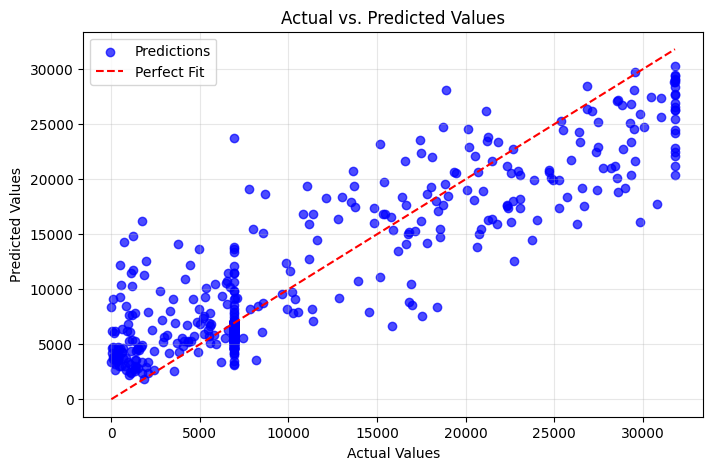

In [56]:
# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, kn_pred, color='blue', alpha=0.7, label="Predictions")

# Add a diagonal reference line
max_val = max(max(y_test), max(kn_pred))
min_val = min(min(y_test), min(kn_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Fit")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## H) Models pipelines

In [57]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

# create a list of models 
models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(random_state = 42),
    "Random Forest":RandomForestRegressor(random_state = 42,n_estimators=100),
    "XGB Regessor":XGBRegressor(random_state = 42),
    "LGBM Regressor":LGBMRegressor(random_state =42)
}

# create a list to store result

result = []

for model_name,model in models.items():
    pipeline = Pipeline(steps =[("regressor",model)])
    pipeline.fit(x_train,y_train)
    y_pred = pipeline.predict(x_test)


    # evaluate the model 
    mae= mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    result.append({
        "model":model_name,
        
         "mse":mse,
          'r2':r2
    }
    )
result_Df1 = pd.DataFrame(result)
print(result_Df1)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 8
[LightGBM] [Info] Start training from score 9964.876291
               model           mse        r2
0  Linear Regression  4.150167e+07  0.445419
1      Decision Tree  1.440645e+07  0.807488
2      Random Forest  7.929841e+06  0.894035
3       XGB Regessor  8.488940e+06  0.886563
4     LGBM Regressor  8.120106e+06  0.891492


## I)XGB Regressor 

In [58]:
# Add polynomial features to the dataset
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

xgb_model = XGBRegressor(n_estimators =100,max_depth  =3,learning_rate =0.1)
xgb_model.fit(X_train_poly,y_train) # fitting the data

xgb_test = xgb_model.predict(X_test_poly)
xgb_train =xgb_model.predict(X_train_poly)

# model evaluation
print("The r2 score for training  is :",np.round(r2_score(y_train,xgb_train),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_train,xgb_train),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_train,xgb_train),4))

print()
print("The r2 score for testing:",np.round(r2_score(y_test,xgb_test),4))
print("The mean_absolute_error is :",np.round(mean_absolute_error(y_test,xgb_test),4))
print("The mean_squared_error is :",np.round(mean_squared_error(y_test,xgb_test),4))


The r2 score for training  is : 0.9188
The mean_absolute_error is : 1464.1047
The mean_squared_error is : 5713861.7697

The r2 score for testing: 0.8908
The mean_absolute_error is : 1723.3876
The mean_squared_error is : 8175184.6372


In [59]:
import pickle
with open("poly.pkl","wb") as file:
    pickle.dump(poly,file)


In [60]:
import pickle 
with  open("final_model.pickle","wb") as file:
    pickle.dump(gbr,file)
    print("sucess")

sucess
